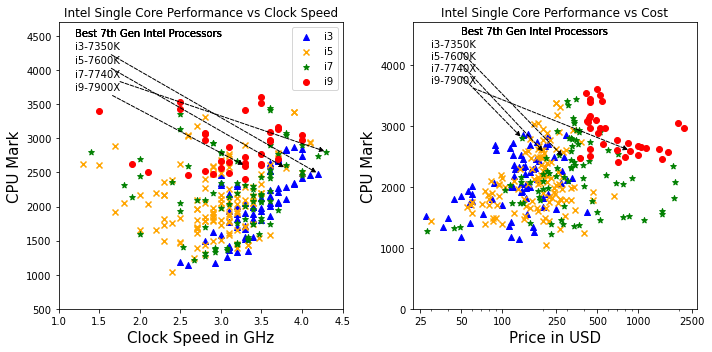

In [52]:
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
def intel(path, gen):
    with open(path,"rt") as content:
        all_speeds=[[],[],[],[]]; all_prices=[[],[],[],[]];  all_cpumarks=[[],[],[],[]];
        price=[[],[],[],[]]; speed=[[],[],[],[]]; cpumark_vs_price=[[],[],[],[]]; cpumark_vs_speed=[[],[],[],[]]; cpumark=[[],[],[],[]];
        speed_model=[[],[],[],[]]; price_model=[[],[],[],[]]; models=[[],[],[],[]];
        processors=["i3","i5","i7","i9"]
        text=content.readlines()
        for line in text:
            if "Intel Core" in line and gen>3:
                speed_value = re.findall(r"....GHz",line)
                price_value = re.findall(r"\$\d+(?:,\d{3})*(?:\.\d+)?",line)
                cpu_mark_value =re.findall(r"[^\$]\d+(?:,\d{3})", line)
                model = str(line).split(" ")[2]
                
                for i in range(0,len(processors)):
                    if processors[i] in line and len(speed_value)>0 and len(price_value)==len(speed_value):
                        speed_float =float(speed_value[0].rstrip("GHz")); cpu_mark_float = float(cpu_mark_value[0].replace(",",""))
                        price_float =float(price_value[0].replace(",","").rstrip("*").lstrip("$"))
                        all_speeds[i].append(speed_float); all_prices[i].append(price_float); all_cpumarks[i].append(cpu_mark_float)
                        speed[i].append(speed_float) if "-"+str(gen) in line else speed[i]==speed[i]
                        price[i].append(price_float) if "-"+str(gen) in line else price[i]==price[i]
                        cpumark[i].append(cpu_mark_float) if "-"+str(gen) in line else cpumark[i]==cpumark[i]
                        models[i].append(model) if "-"+str(gen) in line else models[i]==models[i]
                        
                        
        fig,ax=plt.subplots(1,2, figsize=(10,5))
        ax1=fig.axes[0]; ax2=fig.axes[1]
        ax1.set_xlabel("Clock Speed in GHz", fontsize=15); ax2.set_xlabel("Price in USD", fontsize=15); ax1.set_ylabel("CPU Mark", fontsize=15); ax2.set_ylabel("CPU Mark", fontsize=15);
        ax1.set_xlim(1,4.5); ax1.set_ylim(500,4700); ax2.set_ylim(0,4700); ax2.set_xscale("log")
        ax2.set_xticks([25,50,100,250,500,1000,2500]); ax2.xaxis.set_major_formatter(ScalarFormatter())
        markers=["^","x","*","o"]; labels=["i3","i5","i7","i9"]; colors=["b","orange","g","r"]
        text_loc_speed=[[1.2,4300], [1.2, 4100], [1.2, 3900], [1.2, 3700]]
        text_loc_price=[[30,4300], [30, 4100], [30, 3900], [30, 3700]]
        subtitle_loc_speed=[1.2,4500]; subtitle_loc_price=[50,4500];
        
        for i in range(0,len(price)):
            ax1.scatter(all_speeds[i], all_cpumarks[i], marker=markers[i], label=labels[i], color=colors[i])
            ax2.scatter(all_prices[i], all_cpumarks[i], marker=markers[i], label=labels[i], color=colors[i])
            ax1.legend()
            if len(price[i])>0:
                max_speed_index= speed[i].index(np.max(speed[i])); max_price_index= price[i].index(np.max(price[i]));  
                max_speed_model= models[i][ max_speed_index];  max_price_model= models[i][ max_price_index];
                
                max_cpumark=np.max(cpumark[i]); max_cpumark_index= cpumark[i].index(np.max(cpumark[i]))
                max_cpumark_speed=speed[i][max_cpumark_index]; max_cpumark_price=price[i][max_cpumark_index]
                max_model=models[i][max_cpumark_index]
                
                ax1.annotate(max_model, xy=[max_cpumark_speed, max_cpumark], xytext=[text_loc_speed[i][0], text_loc_speed[i][1]], arrowprops= dict(facecolor="black", arrowstyle="-|>", linestyle="--"))
                ax1.text(subtitle_loc_speed[0], subtitle_loc_speed[1], "Best "+str(gen)+"th Gen Intel Processors")
                ax1.set_title("Intel Single Core Performance vs Clock Speed"); 
                
                ax2.annotate(max_model, xy=[max_cpumark_price, max_cpumark], xytext=[text_loc_price[i][0], text_loc_price[i][1]], arrowprops= dict(facecolor="black", arrowstyle="-|>", linestyle="--"))
                ax2.text(subtitle_loc_price[0], subtitle_loc_price[1], "Best "+str(gen)+"th Gen Intel Processors")
                ax2.set_title("Intel Single Core Performance vs Cost")
                
        fig.tight_layout()
intel("/Users/oakinyemi/intel_assignment.txt", 7)   ### Use this to run the code
        

                


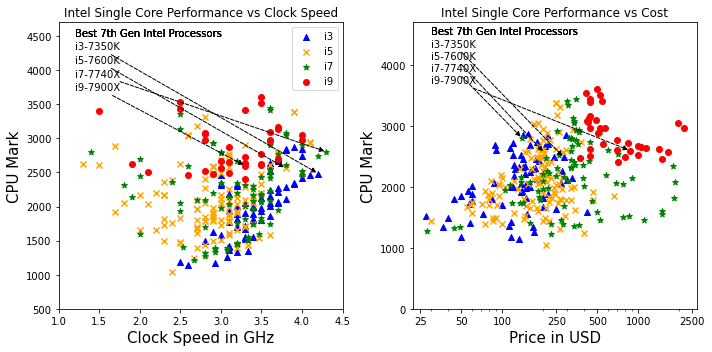

In [117]:
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
def intel(path, gen):
    # open the text file
    with open(path,"rt") as content:
        # initialize speeds, prices and cpu marks
        all_speeds=[[],[],[],[]]; all_prices=[[],[],[],[]];  all_cpumarks=[[],[],[],[]];
        price=[[],[],[],[]]; speed=[[],[],[],[]]; cpumark_vs_price=[[],[],[],[]]; cpumark_vs_speed=[[],[],[],[]]; cpumark=[[],[],[],[]];
        speed_model=[[],[],[],[]]; price_model=[[],[],[],[]]; models=[[],[],[],[]];
        processors=["i3","i5","i7","i9"]
        text=content.readlines()
        # search line by line and use regex pattern matching to extract
        # useful information.
        for line in text:
            if "Intel Core" in line and gen>3:
                speed_value = re.findall(r"....GHz",line)
                price_value = re.findall(r"\$\d+(?:,\d{3})*(?:\.\d+)?",line)
                cpu_mark_value =re.findall(r"[^\$]\d+(?:,\d{3})", line)
                model = str(line).split(" ")[2]
                
                for i in range(0,len(processors)):
                    if processors[i] in line and len(speed_value)>0 and len(price_value)==len(speed_value):
                        speed_float =float(speed_value[0].rstrip("GHz")); cpu_mark_float = float(cpu_mark_value[0].replace(",",""))
                        price_float =float(price_value[0].replace(",","").rstrip("*").lstrip("$"))
                        all_speeds[i].append(speed_float); all_prices[i].append(price_float); all_cpumarks[i].append(cpu_mark_float)
                        speed[i].append(speed_float) if "-"+str(gen) in line else speed[i]==speed[i]
                        price[i].append(price_float) if "-"+str(gen) in line else price[i]==price[i]
                        cpumark[i].append(cpu_mark_float) if "-"+str(gen) in line else cpumark[i]==cpumark[i]
                        models[i].append(model) if "-"+str(gen) in line else models[i]==models[i]
                        
        fig,ax=plt.subplots(1,2, figsize=(10,5))
        ax1=fig.axes[0]; ax2=fig.axes[1]
        ax1.set_xlabel("Clock Speed in GHz", fontsize=15); ax2.set_xlabel("Price in USD", fontsize=15); ax1.set_ylabel("CPU Mark", fontsize=15); ax2.set_ylabel("CPU Mark", fontsize=15);
        ax1.set_xlim(1,4.5); ax1.set_ylim(500,4700); ax2.set_ylim(0,4700); ax2.set_xscale("log")
        ax2.set_xticks([25,50,100,250,500,1000,2500]); ax2.xaxis.set_major_formatter(ScalarFormatter())
        markers=["^","x","*","o"]; labels=["i3","i5","i7","i9"]; colors=["b","orange","g","r"]
        text_loc_speed=[[1.2,4300], [1.2, 4100], [1.2, 3900], [1.2, 3700]]
        text_loc_price=[[30,4300], [30, 4100], [30, 3900], [30, 3700]]
        subtitle_loc_speed=[1.2,4500]; subtitle_loc_price=[30,4500];
        
        for i in range(0,len(price)):
            ax1.scatter(all_speeds[i], all_cpumarks[i], marker=markers[i], label=labels[i], color=colors[i])
            ax2.scatter(all_prices[i], all_cpumarks[i], marker=markers[i], label=labels[i], color=colors[i])
            if len(price[i])>0:
                max_speed_index= speed[i].index(np.max(speed[i])); max_price_index= price[i].index(np.max(price[i]));  
                max_speed_model= models[i][ max_speed_index];  max_price_model= models[i][ max_price_index];
                
                max_cpumark=np.max(cpumark[i]); max_cpumark_index= cpumark[i].index(np.max(cpumark[i]))
                max_cpumark_speed=speed[i][max_cpumark_index]; max_cpumark_price=price[i][max_cpumark_index]
                max_model=models[i][max_cpumark_index]
                
                ax1.annotate(max_model, xy=[max_cpumark_speed, max_cpumark], xytext=[text_loc_speed[i][0], text_loc_speed[i][1]], arrowprops= dict(facecolor="black", arrowstyle="-|>", linestyle="--"))
                ax1.text(subtitle_loc_speed[0], subtitle_loc_speed[1], "Best "+str(gen)+"th Gen Intel Processors")
                ax1.set_title("Intel Single Core Performance vs Clock Speed"); ax1.legend()
                
                ax2.annotate(max_model, xy=[max_cpumark_price, max_cpumark], xytext=[text_loc_price[i][0], text_loc_price[i][1]], arrowprops= dict(facecolor="black", arrowstyle="-|>", linestyle="--"))
                ax2.text(subtitle_loc_price[0], subtitle_loc_price[1], "Best "+str(gen)+"th Gen Intel Processors")
                ax2.set_title("Intel Single Core Performance vs Cost")
        fig.tight_layout()
intel("/Users/oakinyemi/intel_assignment.txt", 7)   ### Use this to run the code
        

      


In [97]:
### import libraries
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd

In [98]:
### open text file and read line by line
def open_file(path):
    with open(path,"rt") as content:
        list_of_lines = content.readlines()
        return list_of_lines
        
lines = open_file("/Users/oakinyemi/intel_assignment.txt")


In [149]:
# initialize a dictionary for storing speeds, cpu marks and prices

info_dict = {"model":[], "speed":[], "price":[],  "cpu_mark":[]}

''' Loop through the lines and input keys and values into the dictionary 
 on the condition that "intel core" is in the line '''

models = ["i3", "i5", "i7", "i9"]

for line in lines:
    if "Intel Core" in line and any(model in line for model in models):
        
        # use regex to search to find patterns
        
        speed = re.findall(r"....GHz",line)
        price = re.findall(r"\$\d+(?:,\d{3})*(?:\.\d+)?",line)
        cpu_mark =re.findall(r"[^\$]\d+(?:,\d{3})", line)
        if len(line) >= 2:
            model = str(line).split(" ")[2]
            model = model[0:2]
        
        # only record lines where there's information for all fields
        
        if len(speed)==len(price)==len(cpu_mark)==1:
            # strip the units and convert to floating numbers
            speed =float(speed[0].rstrip("GHz")); 
            cpu_mark = float(cpu_mark[0].replace(",",""))
            price =float(price[0].replace(",","").rstrip("*").lstrip("$"))    
            
            info_dict["model"].append(model)
            info_dict["speed"].append(speed)
            info_dict["price"].append(price)
            info_dict["cpu_mark"].append(cpu_mark)
df = pd.DataFrame(info_dict)

In [150]:
df

,model,speed,price,cpu_mark
0,i9,3.50,499.99,3599.0
1,i9,2.50,409.99,3537.0
2,i9,3.50,519.99,3513.0
3,i7,3.60,349.99,3441.0
4,i9,2.50,439.99,3436.0
...,...,...,...,...
296,i7,2.67,227.21,1220.0
297,i3,2.50,49.87,1183.0
298,i3,2.93,115.19,1177.0
299,i3,2.60,133.89,1144.0


In [151]:
df[df["model"]=="i3"]

,model,speed,price,cpu_mark
38,i3,3.90,154.00,2871.0
39,i3,3.80,142.00,2849.0
40,i3,4.00,293.22,2847.0
41,i3,3.80,218.00,2834.0
51,i3,4.00,179.98,2745.0
...,...,...,...,...
289,i3,3.20,167.95,1339.0
294,i3,3.07,169.98,1264.0
297,i3,2.50,49.87,1183.0
298,i3,2.93,115.19,1177.0
